In [54]:
#This module introduces the files ...
import nltk
from nltk.tokenize import word_tokenize
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.text import Text  
import pandas as pd
import numpy as np
import glob, os
from os import listdir

import re
def is_digit(word):
    try:
        int(word)
        return True
    except ValueError:
        return False

cedilla2latin = [[u'Á', u'A'], [u'á', u'a'], [u'Č', u'C'], [u'č', u'c'], [u'Š', u'S'], [u'š', u's']]
tr = dict([(a[0], a[1]) for (a) in cedilla2latin])

# Now only lowercase and special characters remain. As lowercase only supports Latin letters, the special 
#characters need to be turned to Latin. This can be done using Transliterate Python package.
def transliterate(line):
    new_line = ""
    for letter in line:
        if letter in tr:
            new_line += tr[letter]
        else:
            new_line += letter
    return new_line




#This line of code will read in all the artist to choose from
x=os.listdir("/Users/robinghosh/Desktop/AI_project/Song_Lyrics")
print("Here is a list of the Generes to choose from..")
a=1
genere_list=[]
while(a<len(x)):
    for i in x:
        if i == '.DS_Store':
            i = ''
            continue
        
        print(a,":\t",i)
        genere_list.append(i)
        a=a+1
    
#This block of code asks the user to choose which genere the lyrics will come from
x = input("\nPlease type in the number of your Genere and press 'Enter': ")
x=int(x)
genere = genere_list[x-1]
y=os.listdir("/Users/robinghosh/Desktop/AI_project/Song_Lyrics/%s" %genere)
print("Here is a list of the Artist to choose from..")
a=1
artist_list=[]
while(a<len(y)):
    for i in y:
        if i == '.DS_Store':
            i = ''
            continue
        
        print(a,":\t",i)
        artist_list.append(i)
        a=a+1
    
#This block of code asks the user to choose which artist the lyrics will come from
x = input("\n\nPlease type the number for your Artist and press 'Enter': ")
x=int(x)
filename = artist_list[x-1]
z=os.listdir("/Users/robinghosh/Desktop/AI_project/Song_Lyrics/%s/%s" %(genere,filename))
a=1
lyrics_list=[]
while(a<len(z)):
    for i in z:
        if i == '.DS_Store':
            i = ''
            continue
        
        print(a,":\t",i)
        lyrics_list.append(i)
        a=a+1

    
#This block of code will ask the user to choose which song lyrics to ananlyze and clean
x = input("\nHello, user. Please type in the number of your song and press 'Enter':")
x = int(x)
song = lyrics_list[x-1]

#This module produces the raw ouput from the chosen file..
file = open("/Users/robinghosh/Desktop/AI_project/Song_Lyrics/%s/%s/%s"%(genere,filename,song))


for i in song:
    print(file.readline())

Here is a list of the Generes to choose from..
1 :	 Pop
2 :	 Metal
3 :	 Christian
4 :	 Classic Rock
5 :	 Country
6 :	 Rap

Please type in the number of your Genere and press 'Enter': 6
Here is a list of the Artist to choose from..
1 :	 Eminem
2 :	 Jay-Z
3 :	 50_Cent
4 :	 _DS_Store


Please type the number for your Artist and press 'Enter': 2
1 :	 Jay-Z - Ain_t No Nigga.txt
2 :	 Jay-Z - Big Pimpin.txt
3 :	 Jay-Z - The Story of O.J..txt
4 :	 Jay-Z - Reneage.txt
5 :	 Jay-Z - Niggas in Paris.txt
6 :	 _DS_Store

Hello, user. Please type in the number of your song and press 'Enter':5
"Niggas In Paris"

(with Kanye West)



We're gonna skate to one song and one song only.



So I ball so hard muhfuckas wanna fine me

first niggas gotta find me

What’s 50 grand to a muhfucka like me

Can you please remind me?

Ball so hard, this shit crazy

Y’all don’t know that don’t shit phase me

The Nets could go 0-82 and I look at you like this shit gravy

Ball so hard, this shit weird

We ain’t even supp

In [55]:
#### This module takes the chosen file and cleans the txt, then is writen to an output file called cleandata.txt..
file = open("/Users/robinghosh/Desktop/AI_project/Song_Lyrics/%s/%s/%s"%(genere,filename,song), encoding='utf8')
outfile = open('cleandata.txt','w')


for line in file:
    line = line.replace('+', ' ').replace('[', ' ').replace(']', ' ').replace('*', ' ').replace('(', ' ').replace(')', ' ').replace('.', ' ').replace(',', ' ').replace(':', ' ').replace('\'', '').replace('-', ' ').replace('\"', ' ').replace('!', ' ').replace('?', ' ')
    # remove digits with regex
    line = re.sub("(^|\W)\d+($|\W)", " ", line)
    # OR remove digits with casting to int
    new_line = []
    for word in line.split():
        if not is_digit(word):
            new_line.append(word)
    line = " ".join(new_line)

    # transliterate to Latin characters
    line = transliterate(line)
    line = line.lower()
    outfile.write(line + '\n')

In [56]:
lyrics = open('cleandata.txt','r')

allbadwords = ['damn', 'stupid', 'shit','darnit', 'dumb', 'ass', 'fat load', 'cum', 'sperm', 'ass', 'butt', 'butthole', 'penis',
          'vagina', 'pussy', 'dick','fuck', 'fucking','fuck buttons','shit','anal','sodomize','sodomy','rape','raping','date rape','daterape',
            'slut','nigger','camslut','camwhore','wetback','clusterfuck','faggot','nig nog','muhfuckas', 'muhfucka', 'niggas'] 

badwords1=['damn', 'stupid', 'darnit', 'hell', 'dumb', 'fat load', 'cum', 'sperm', 'ass', 'butt', 'butthole', 'penis',
          'vagina', 'pussy', 'dick']

badwords2 = ['fuck', 'fucking','fuck buttons','shit','anal','sodomize','sodomy','rape','raping','date rape','daterape',
            'slut','nigger','camslut','camwhore','wetback','clusterfuck','faggot','nig nog', 'muhfuckas', 'muhfucka', 'niggas']


    
def G_classification(allbadwords, lyrics):
    listof_ABW = allbadwords
    
    file = lyrics
    count = 0  
   
    for line in file:
        for word in line.split():
            for i in listof_ABW:
                if word == i:
                    count = count +1
    return count 


def R_classification(badwords2, lyrics):
    listof_ABW2 = badwords2
    R_BW_said = []
    file = lyrics
    
    for line in file:
        for word in line.split():
            for i in listof_ABW2:
                if word == i:
                    R_BW_said.append(word)
    return R_BW_said
                    
                    


def PG13_classification (badwords1, badwords2, lyrics):
    PG13_BW = badwords1
    R_BW = badwords2
    
    file = lyrics
    file2 = lyrics
    
    for line in file:
        for word in line.split():
            for i in R_BW:
                if word == i:
                    return False
                    break
    for line in file2:
        for word in line.split():        
            for i in PG13_BW:
                if word == i:
                    return True
                    break

#----------------------------------Bad Word Count---------------------------------------

def totalwords(lyrics):
    file = lyrics
    count = 0  

    for line in file:
        for word in line.split():
                count = count +1
    return count 



def Bwtotal(allbadwords, lyrics):
        listof_ABW = allbadwords

        file = lyrics
        count = 0  

        for line in file:
            for word in line.split():
                for i in listof_ABW:
                    if word == i:
                        count = count +1
        return count 
    
# def BwList(allbadwords, lyrics):
#         listof_ABW = allbadwords

#         file = lyrics
#         list = [] 

#         for line in file:
#             for word in line.split():
#                 for i in listof_ABW:
#                     if word == i:
#                         print (word)
                        
# #                         list.append(word) 
#         return list
# print (BwList(allbadwords, lyrics))
    
def rcount(badwords2, lyrics = open('cleandata.txt','r')):
        BW2 = badwords2            
        file = lyrics
        r_count = 0  

        for line in file:
                for word in line.split():
                    for i in BW2:
                        if word == i:
#                             print (word)
                            r_count = r_count +1
                            
        return r_count
    
print (rcount(badwords2, lyrics =  open('cleandata.txt','r')))
            
def pg13count(badwords1, lyrics = open('cleandata.txt','r')):
        BW1 = badwords1
        file = lyrics
        pg13_count = 0  

        for line in file:
                for word in line.split():
                    for i in BW1:
                        if word == i:
                            pg13_count = pg13_count +1
        return pg13_count
    
print (pg13count(badwords1, lyrics =  open('cleandata.txt','r')))

#-----------Calculating Bad Word Percentage------------



def PG13_percentage ():
    pg13 = pg13count(badwords1, lyrics = open('cleandata.txt','r'))
    total = totalwords(lyrics = open('cleandata.txt','r'))
     
    percent = (pg13/total) 
    
    percentage = (percent * 100) 
    
    return round(percentage,4) 

def R_percentage ():
    r = rcount(badwords2,lyrics = open('cleandata.txt','r') )
    total = totalwords(lyrics = open('cleandata.txt','r'))
     
    percent = (r/total) 
    
    percentage = (percent * 100) 
    
    return round(percentage,4)           

                              
                   
#------------------FORM--------------------------------

def READABLE_INFO_FORM ():
    if G_classification(allbadwords,lyrics = open('cleandata.txt','r')) == 0:
        print ("This Song is Classified: G for General Audience")
        print ( "There are a total",totalwords(lyrics = open('cleandata.txt','r')), "words in the lyrics" )

    elif PG13_classification (badwords1,badwords2, lyrics = open('cleandata.txt','r')) == None :
        print ("This Song is Classified: PG13 Parental Guidance if under 13")
        print ( "There are a total",totalwords(lyrics = open('cleandata.txt','r')), "words in the lyrics" )
        print ( "Of those words,",Bwtotal(allbadwords, lyrics = open('cleandata.txt','r')),"are considered bad words" )
        
        #just a test adding both counts
        #print ( "Of those words,", rcount(badwords2, lyrics = open('cleandata.txt','r')) + pg13count(badwords1, lyrics = open('cleandata.txt','r')),"are considered bad words")

        print("This song has a percentage of:",PG13_percentage(), "percent level bad words")
    elif len (R_classification(badwords2, lyrics = open('cleandata.txt','r'))) > 0:
        print ("This song is classified: R Restricted Audience")
        print ( "There are a total",totalwords(lyrics = open('cleandata.txt','r')), "words in the lyrics" )
        print ( "Of those words,",Bwtotal(allbadwords, lyrics = open('cleandata.txt','r')),"are considered bad words" )
        
        #just a test adding both counts
        #print ( "Of those words,", rcount(badwords2, lyrics = open('cleandata.txt','r')) + pg13count(badwords1, lyrics = open('cleandata.txt','r')),"are considered bad words")

        print("This song has a percentage of:",PG13_percentage(),"percent PG13 level bad words")
        print("and has a percentage of:",R_percentage(),"percent R level bad words")     

        
        
        
READABLE_INFO_FORM ()        

17
2
This song is classified: R Restricted Audience
There are a total 511 words in the lyrics
Of those words, 26 are considered bad words
This song has a percentage of: 0.3914 percent PG13 level bad words
and has a percentage of: 3.3268 percent R level bad words


# Converting text files to String

In [57]:
with open('cleandata.txt', 'r') as myfile:
    data=myfile.read().replace('\n', ' ')
    print (data)

niggas in paris with kanye west  were gonna skate to one song and one song only  so i ball so hard muhfuckas wanna fine me first niggas gotta find me what’s grand to a muhfucka like me can you please remind me ball so hard this shit crazy y’all don’t know that don’t shit phase me the nets could go and i look at you like this shit gravy ball so hard this shit weird we ain’t even supposed to be here ball so hard since we here it’s only right that we be fair psycho i’m liable to go michael take your pick jackson tyson jordan game ball so hard got a broke clock rolleys that don’t tick tock audemars that’s losing time hidden behind all these big rocks ball so hard i’m shocked too i’m supposed to be locked up too you escaped what i’ve escaped you’d be in paris getting fucked up too ball so hard let’s get faded le meurice for like days gold bottles scold models spillin’ ace on my sick j’s so ball so hard bitch behave just might let you meet ye chi towns d rose i’m movin’ the nets to bk  ball 

# Using NLTK word tokenization

In [58]:
tokenized_text = nltk.word_tokenize(data)
# tagged = nltk.pos_tag(tokenized_text)
print(tokenized_text)

['niggas', 'in', 'paris', 'with', 'kanye', 'west', 'were', 'gon', 'na', 'skate', 'to', 'one', 'song', 'and', 'one', 'song', 'only', 'so', 'i', 'ball', 'so', 'hard', 'muhfuckas', 'wan', 'na', 'fine', 'me', 'first', 'niggas', 'got', 'ta', 'find', 'me', 'what’s', 'grand', 'to', 'a', 'muhfucka', 'like', 'me', 'can', 'you', 'please', 'remind', 'me', 'ball', 'so', 'hard', 'this', 'shit', 'crazy', 'y’all', 'don’t', 'know', 'that', 'don’t', 'shit', 'phase', 'me', 'the', 'nets', 'could', 'go', 'and', 'i', 'look', 'at', 'you', 'like', 'this', 'shit', 'gravy', 'ball', 'so', 'hard', 'this', 'shit', 'weird', 'we', 'ain’t', 'even', 'supposed', 'to', 'be', 'here', 'ball', 'so', 'hard', 'since', 'we', 'here', 'it’s', 'only', 'right', 'that', 'we', 'be', 'fair', 'psycho', 'i’m', 'liable', 'to', 'go', 'michael', 'take', 'your', 'pick', 'jackson', 'tyson', 'jordan', 'game', 'ball', 'so', 'hard', 'got', 'a', 'broke', 'clock', 'rolleys', 'that', 'don’t', 'tick', 'tock', 'audemars', 'that’s', 'losing', 'tim

# Using NLTK Stop Words

In [62]:
stop_words = set(stopwords.words('english'))
stopped = [word for word in tokenized_text if word not in stopwords.words('english')]
stopped

['niggas',
 'paris',
 'kanye',
 'west',
 'gon',
 'na',
 'skate',
 'one',
 'song',
 'one',
 'song',
 'ball',
 'hard',
 'muhfuckas',
 'wan',
 'na',
 'fine',
 'first',
 'niggas',
 'got',
 'ta',
 'find',
 'what’s',
 'grand',
 'muhfucka',
 'like',
 'please',
 'remind',
 'ball',
 'hard',
 'shit',
 'crazy',
 'y’all',
 'don’t',
 'know',
 'don’t',
 'shit',
 'phase',
 'nets',
 'could',
 'go',
 'look',
 'like',
 'shit',
 'gravy',
 'ball',
 'hard',
 'shit',
 'weird',
 'ain’t',
 'even',
 'supposed',
 'ball',
 'hard',
 'since',
 'it’s',
 'right',
 'fair',
 'psycho',
 'i’m',
 'liable',
 'go',
 'michael',
 'take',
 'pick',
 'jackson',
 'tyson',
 'jordan',
 'game',
 'ball',
 'hard',
 'got',
 'broke',
 'clock',
 'rolleys',
 'don’t',
 'tick',
 'tock',
 'audemars',
 'that’s',
 'losing',
 'time',
 'hidden',
 'behind',
 'big',
 'rocks',
 'ball',
 'hard',
 'i’m',
 'shocked',
 'i’m',
 'supposed',
 'locked',
 'escaped',
 'i’ve',
 'escaped',
 'you’d',
 'paris',
 'getting',
 'fucked',
 'ball',
 'hard',
 'let’s',

# Converting List into String

In [63]:
str2 = " ".join(str(x) for x in stopped)
str2

'niggas paris kanye west gon na skate one song one song ball hard muhfuckas wan na fine first niggas got ta find what’s grand muhfucka like please remind ball hard shit crazy y’all don’t know don’t shit phase nets could go look like shit gravy ball hard shit weird ain’t even supposed ball hard since it’s right fair psycho i’m liable go michael take pick jackson tyson jordan game ball hard got broke clock rolleys don’t tick tock audemars that’s losing time hidden behind big rocks ball hard i’m shocked i’m supposed locked escaped i’ve escaped you’d paris getting fucked ball hard let’s get faded le meurice like days gold bottles scold models spillin’ ace sick j’s ball hard bitch behave might let meet ye chi towns rose i’m movin’ nets bk ball hard muhfuckas wan na fine shit cray 3x said ye get married mall said look need crawl ‘fore ball come meet bathroom stall show deserve ball hard shit cray shit cray ain’t jay ball hard order order fish filet ball hard whip cold whip cold old thing bal

# Visulaizing Using Wordcloud

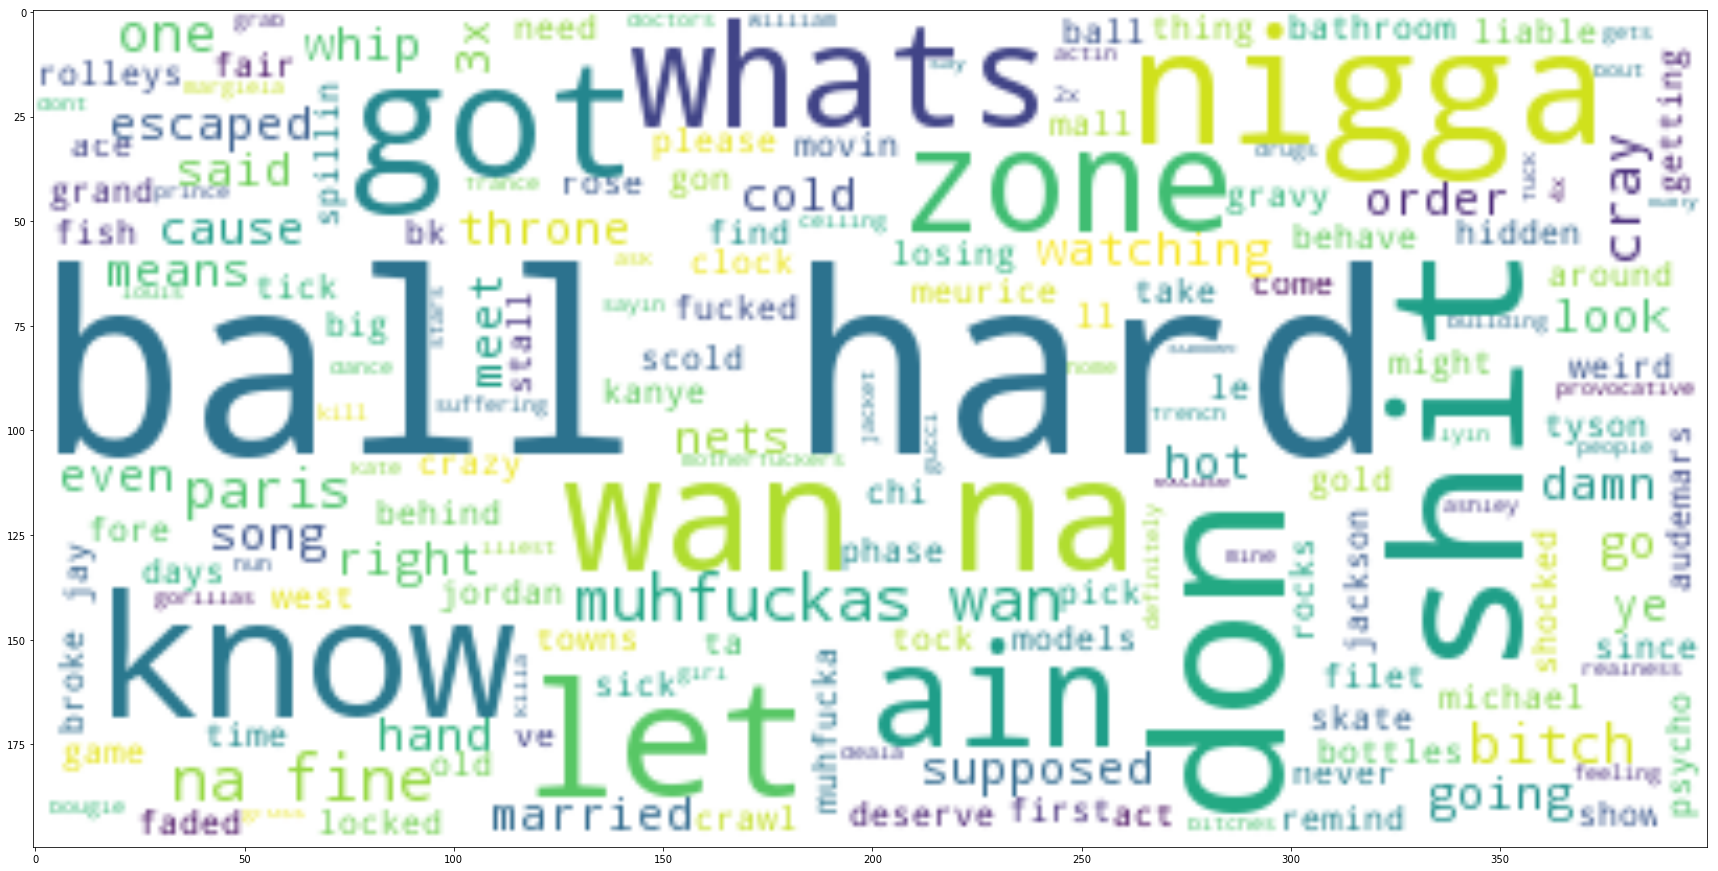

In [64]:
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(background_color="white", max_font_size=60).generate(str2)
plt.figure(figsize=(30,25))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

# Counting the Number of words occured

In [70]:
from collections import Counter
c = Counter(stopped)
vis_data = c.most_common()
vis_data

[('ball', 16),
 ('hard', 15),
 ('i’m', 10),
 ('shit', 7),
 ('don’t', 7),
 ('na', 6),
 ('like', 6),
 ('wan', 5),
 ('got', 5),
 ('know', 5),
 ('niggas', 4),
 ('muhfuckas', 4),
 ('fine', 4),
 ('ain’t', 4),
 ('get', 4),
 ('let', 4),
 ('whats', 4),
 ('zone', 4),
 ('paris', 3),
 ('one', 3),
 ('bitch', 3),
 ('cray', 3),
 ('song', 2),
 ('nets', 2),
 ('go', 2),
 ('look', 2),
 ('even', 2),
 ('supposed', 2),
 ('right', 2),
 ('escaped', 2),
 ('meet', 2),
 ('ye', 2),
 ('3x', 2),
 ('said', 2),
 ('married', 2),
 ('order', 2),
 ('whip', 2),
 ('cold', 2),
 ('cause', 2),
 ('going', 2),
 ('means', 2),
 ('watching', 2),
 ('throne', 2),
 ('hot', 2),
 ('damn', 2),
 ('kanye', 1),
 ('west', 1),
 ('gon', 1),
 ('skate', 1),
 ('first', 1),
 ('ta', 1),
 ('find', 1),
 ('what’s', 1),
 ('grand', 1),
 ('muhfucka', 1),
 ('please', 1),
 ('remind', 1),
 ('crazy', 1),
 ('y’all', 1),
 ('phase', 1),
 ('could', 1),
 ('gravy', 1),
 ('weird', 1),
 ('since', 1),
 ('it’s', 1),
 ('fair', 1),
 ('psycho', 1),
 ('liable', 1),
 ('mi

# Visualizing the most frequent words based on counter

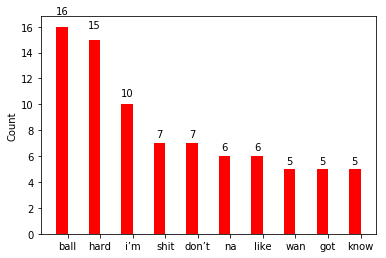

In [72]:
import numpy as np
import matplotlib.pyplot as plt

vis_data = [('ball', 16),
 ('hard', 15),
 ('i’m', 10),
 ('shit', 7),
 ('don’t', 7),
 ('na', 6),
 ('like', 6),
 ('wan', 5),
 ('got', 5),
 ('know', 5)]
names, values = zip(*vis_data)  # @comment by Matthias
# names = [x[0] for x in data]  # These two lines are equivalent to the the zip-command.
# values = [x[1] for x in data] # These two lines are equivalent to the the zip-command.

ind = np.arange(len(vis_data))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, values, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_xticks(ind+width/2.)
ax.set_xticklabels(names)



def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()

In [107]:
# import pandas as pd
# df = pd.DataFrame(vis_data, columns=["word", "count"])
# cols = df.columns.tolist()
# cols = cols[-1:] + cols[:-1]
# df1 = df[cols]
# # import seaborn as sns
# # sns.jointplot(x="word", y="count", data=df1);